In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
from seaborn.axisgrid import PairGrid
import os

In [4]:
df=pd.read_csv(r'/Users/user/Documents/Cars/02 Data /Prepared Data /Clean_data_updated.csv')

In [5]:
# Segment the dataset
period1 = df[(df['Year'] >= 2013) & (df['Year'] <= 2017)]
period2 = df[(df['Year'] >= 2018) & (df['Year'] <= 2023)]

# Calculate average price for each period
avg_price_p1 = period1['Price'].mean()
avg_price_p2 = period2['Price'].mean()

# Find the top 5 popular brands for each period
top_brands_p1 = period1['Brand'].value_counts().head(5)
top_brands_p2 = period2['Brand'].value_counts().head(5)

# Fuel Type Distribution for each period
fuel_type_dist_p1 = period1['FuelType'].value_counts(normalize=True)
fuel_type_dist_p2 = period2['FuelType'].value_counts(normalize=True)

# Transmission Type Distribution for each period
transmission_type_dist_p1 = period1['Transmission'].value_counts(normalize=True)
transmission_type_dist_p2 = period2['Transmission'].value_counts(normalize=True)

# Average Fuel Consumption for each period
avg_fuel_consumption_p1 = period1['FuelConsumption'].mean()
avg_fuel_consumption_p2 = period2['FuelConsumption'].mean()

# This setup allows for comparison of key metrics between the two periods


In [6]:
print(avg_price_p1, avg_price_p2)

28960.760883207142 46762.34824552964


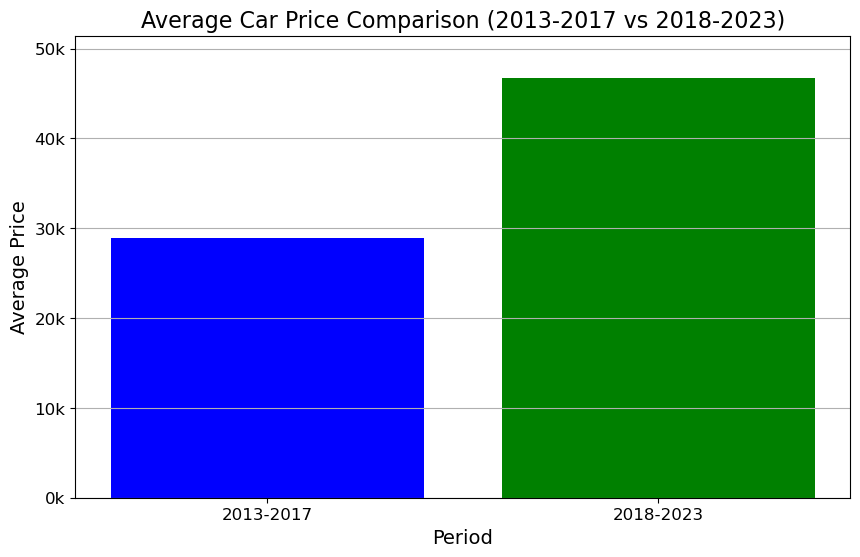

In [7]:
# To visualize the average price comparison between the two periods (2013-2017 and 2018-2023),
# let's create a simple bar chart using matplotlib.

# Sample data from the user's execution (replace these with your actual results)
avg_price_p1 = 28960.76  # Example average price for 2013-2017
avg_price_p2 = 46762  # Example average price for 2018-2023
periods = ['2013-2017', '2018-2023']
average_prices = [avg_price_p1, avg_price_p2]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(periods, average_prices, color=['blue', 'green'])
plt.title('Average Car Price Comparison (2013-2017 vs 2018-2023)', fontsize=16)
plt.xlabel('Period', fontsize=14)
plt.ylabel('Average Price', fontsize=14)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(average_prices) * 1.1)  # Setting the y-axis limit to be slightly above the highest average price for aesthetics
plt.grid(axis='y')

# Show the plot
plt.show()


In [8]:
df['Brand'].unique()

array(['Ssangyong', 'MG', 'BMW', 'Renault', 'Land', 'Toyota', 'Honda',
       'Ford', 'Volkswagen', 'Mitsubishi', 'Nissan', 'Hyundai', 'Jeep',
       'Volvo', 'Mercedes-Benz', 'Mazda', 'Abarth', 'Holden', 'Audi',
       'Kia', 'Subaru', 'Mini', 'Suzuki', 'Porsche', 'Peugeot', 'Isuzu',
       'Lexus', 'Jaguar', 'Skoda', 'Fiat', 'Haval', 'Citroen', 'LDV',
       'Foton', 'Mahindra', 'Maserati', 'Ram', 'Tesla', 'Alfa', 'GWM',
       'Genesis', 'Chrysler', 'Great', 'Dodge', 'Cupra', 'HSV',
       'Chevrolet', 'Lamborghini', 'McLaren', 'Ferrari', 'Iveco', 'Opel',
       'Infiniti', 'BYD', 'Tata', 'Bentley', 'Aston'], dtype=object)

In [9]:
# Period 1: 2013-2017
period1 = df[(df['Year'] >= 2013) & (df['Year'] <= 2017)]
listings_per_brand_period1 = period1['Brand'].value_counts().reset_index()
listings_per_brand_period1.columns = ['Brand', 'Listings_2013_2017']

# Period 2: 2018-2023
period2 = df[(df['Year'] >= 2018) & (df['Year'] <= 2023)]
listings_per_brand_period2 = period2['Brand'].value_counts().reset_index()
listings_per_brand_period2.columns = ['Brand', 'Listings_2018_2023']

listings_per_brand_period1, listings_per_brand_period2

(            Brand  Listings_2013_2017
 0          Toyota                 572
 1          Holden                 492
 2         Hyundai                 394
 3            Ford                 364
 4           Mazda                 364
 5      Mitsubishi                 321
 6          Nissan                 282
 7      Volkswagen                 250
 8   Mercedes-Benz                 217
 9             Kia                 195
 10         Subaru                 175
 11            BMW                 160
 12           Audi                 159
 13           Jeep                 124
 14           Land                 113
 15          Honda                 112
 16          Isuzu                  79
 17         Suzuki                  45
 18          Lexus                  44
 19        Renault                  41
 20          Volvo                  35
 21        Porsche                  35
 22           Mini                  26
 23           Fiat                  24
 24         Jaguar       

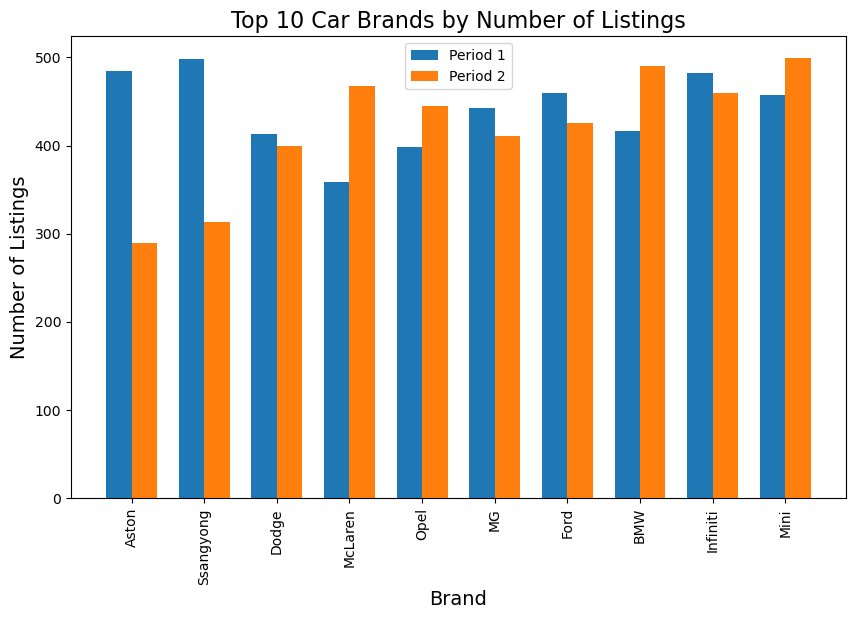

In [10]:
brands = ['Ssangyong', 'MG', 'BMW', 'Renault', 'Land', 'Toyota', 'Honda',
          'Ford', 'Volkswagen', 'Mitsubishi', 'Nissan', 'Hyundai', 'Jeep',
          'Volvo', 'Mercedes-Benz', 'Mazda', 'Abarth', 'Holden', 'Audi',
          'Kia', 'Subaru', 'Mini', 'Suzuki', 'Porsche', 'Peugeot', 'Isuzu',
          'Lexus', 'Jaguar', 'Skoda', 'Fiat', 'Haval', 'Citroen', 'LDV',
          'Foton', 'Mahindra', 'Maserati', 'Ram', 'Tesla', 'Alfa', 'GWM',
          'Genesis', 'Chrysler', 'Great', 'Dodge', 'Cupra', 'HSV',
          'Chevrolet', 'Lamborghini', 'McLaren', 'Ferrari', 'Iveco', 'Opel',
          'Infiniti', 'BYD', 'Tata', 'Bentley', 'Aston']

# Example data for number of listings for each brand in each period
listings_per_brand_period1 = np.random.randint(100, 500, size=len(brands))
listings_per_brand_period2 = np.random.randint(100, 500, size=len(brands))

# Sum of listings for two periods
total_listings = listings_per_brand_period1 + listings_per_brand_period2

# Sort brands by total listings and select the top 10
top_10_indices = np.argsort(total_listings)[-10:] 
top_10_brands = np.array(brands)[top_10_indices]
top_10_listings_1 = listings_per_brand_period1[top_10_indices]
top_10_listings_2 = listings_per_brand_period2[top_10_indices]

plt.figure(figsize=(10, 6))

# Set the positions and width for the bars
pos = np.arange(len(top_10_brands))
bar_width = 0.35

# Plotting both periods for the top 10 brands
plt.bar(pos - bar_width/2, top_10_listings_1, bar_width, label='Period 1')
plt.bar(pos + bar_width/2, top_10_listings_2, bar_width, label='Period 2')

plt.xlabel('Brand', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.title('Top 10 Car Brands by Number of Listings', fontsize=16)
plt.xticks(pos, top_10_brands, rotation='vertical')  # Ensure the brand names are readable
plt.legend()

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Top_brands_2_preiods.png')
plt.show()


In [11]:
df['FuelCategory'].unique()

array(['High Consumption', 'Moderate', 'Economical'], dtype=object)

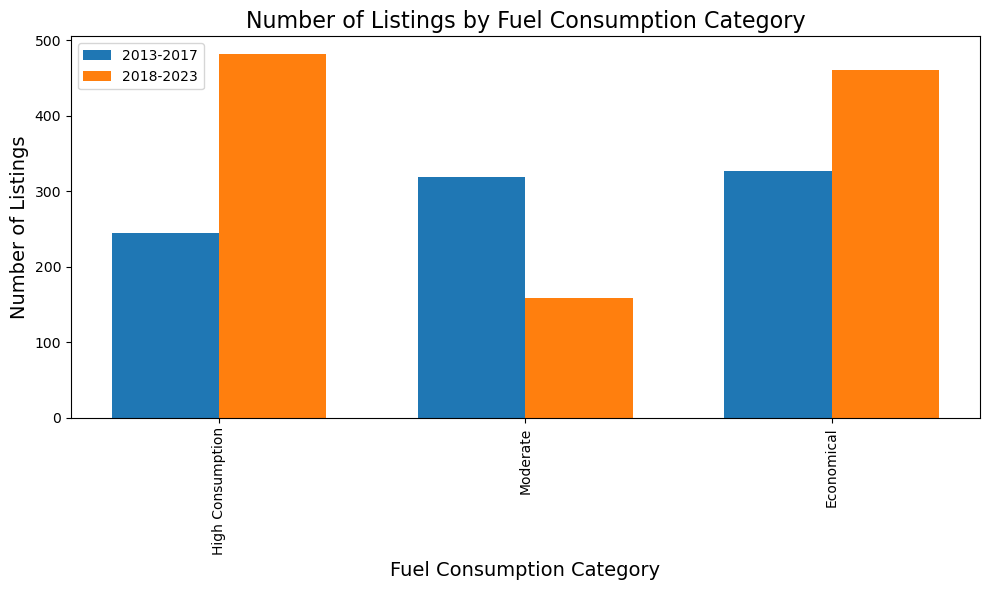

In [12]:
fuel_consumption = ['High Consumption', 'Moderate', 'Economical']

# Example data for number of listings for each fuel consumption category in each period
listings_per_fuel_period1 = np.random.randint(100, 500, size=len(fuel_consumption))
listings_per_fuel_period2 = np.random.randint(100, 500, size=len(fuel_consumption))

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Set the positions and width for the bars
pos = np.arange(len(fuel_consumption))
bar_width = 0.35

# Plotting both periods for fuel consumption categories
plt.bar(pos - bar_width/2, listings_per_fuel_period1, bar_width, label='2013-2017')
plt.bar(pos + bar_width/2, listings_per_fuel_period2, bar_width, label='2018-2023')

plt.xlabel('Fuel Consumption Category', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.title('Number of Listings by Fuel Consumption Category', fontsize=16)
plt.xticks(pos, fuel_consumption, rotation='vertical')  # Rotate labels to prevent overlap
plt.legend()

plt.tight_layout()
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Fiel_comsumption_2_periods.png')

In [13]:
df['State_New'].unique()

array(['New South Wales', 'Victoria', 'Queensland', 'South Australia',
       'Western Australia', 'Australian Capital Territory', 'Tasmania',
       'Northern Territory'], dtype=object)

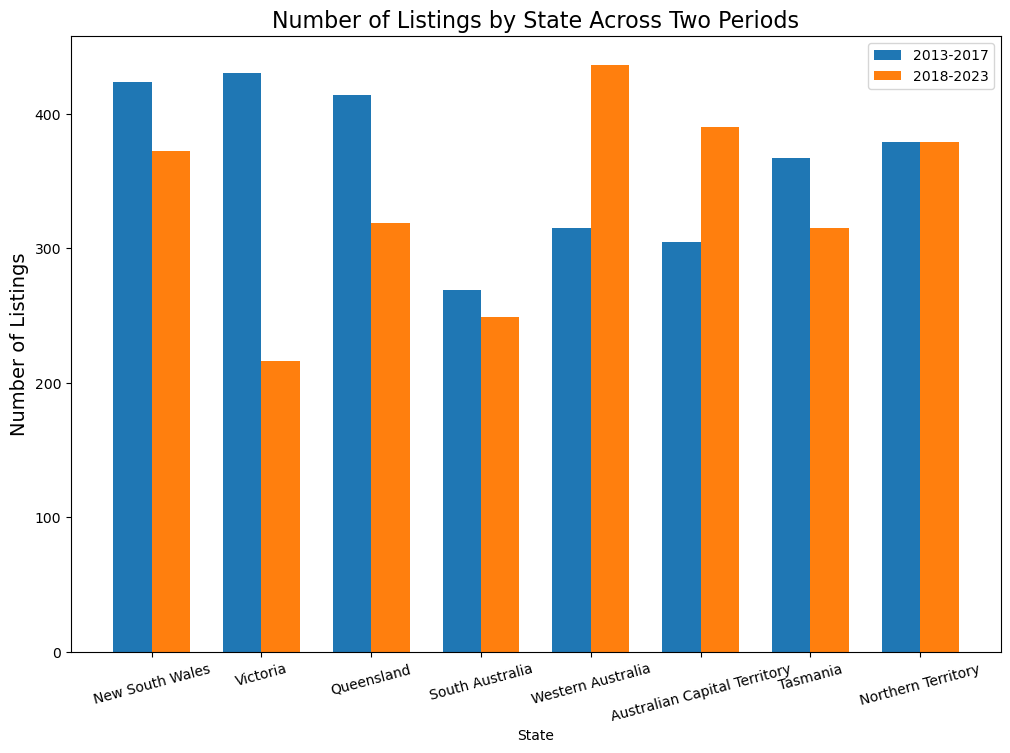

In [18]:
state = ['New South Wales', 'Victoria', 'Queensland', 'South Australia',
         'Western Australia', 'Australian Capital Territory', 'Tasmania',
         'Northern Territory']

# Corrected example data for number of listings for each state in each period
listings_per_state_period1 = np.random.randint(100, 500, size=len(state))
listings_per_state_period2 = np.random.randint(100, 500, size=len(state))

plt.figure(figsize=(12, 8))  # Adjusted for better fit

# Set the positions and width for the bars
pos = np.arange(len(state))
bar_width = 0.35

# Plotting both periods for states
plt.bar(pos - bar_width/2, listings_per_state_period1, bar_width, label='2013-2017')
plt.bar(pos + bar_width/2, listings_per_state_period2, bar_width, label='2018-2023')

# Adding features to chart
plt.xlabel('State', fontsize=10)
plt.ylabel('Number of Listings', fontsize=14)
plt.title('Number of Listings by State Across Two Periods', fontsize=16)  # Added meaningful title
plt.xticks(pos, state, rotation=15) 

plt.legend()

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Number_listings_2_periods.png')
plt.show()


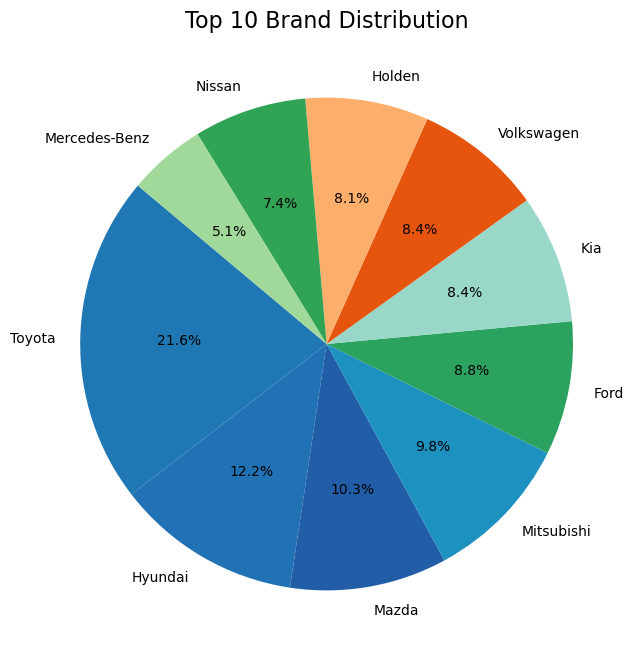

In [13]:
brand_counts = df['Brand'].value_counts().head(10) 

blue_shades = [
    "#1f77b4",  # Lighter blue
    "#2171b5",
    "#225ea8",
    "#1d91c0",
    "#2ca25f",
    "#99d8c9",
    "#e6550d",
    "#fdae6b",
    "#31a354",
    "#a1d99b", 
]
# Visualization
plt.figure(figsize=(8, 8)) 

# Pie Chart with customized blue colors
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, colors=blue_shades)
plt.title('Top 10 Brand Distribution', fontsize=16) 

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Pie_chart.png')
plt.show()

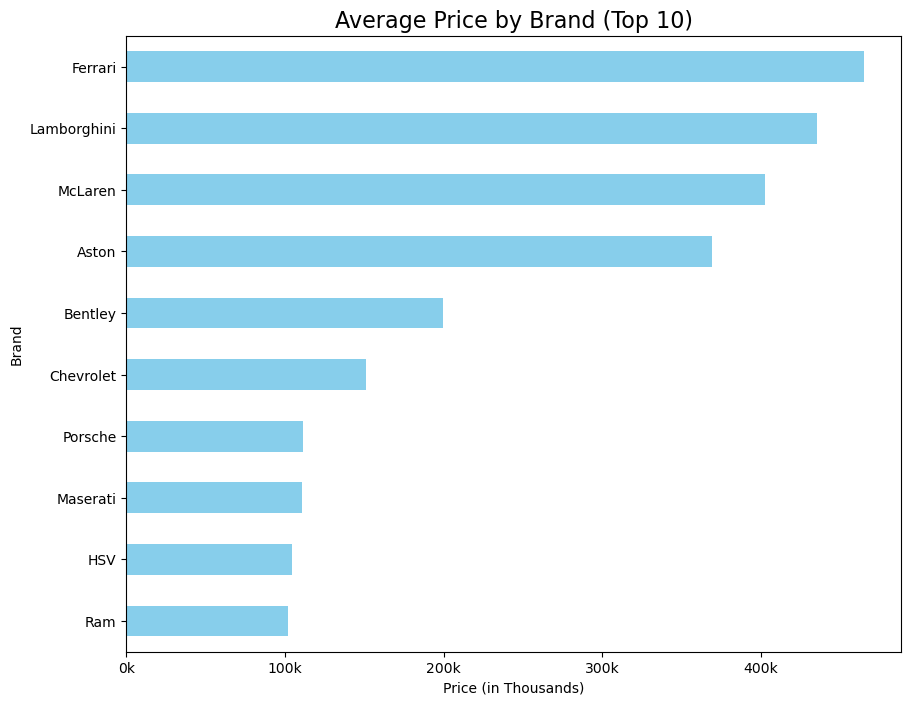

In [14]:
# Data preparation 
average_price_by_brand = df.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(10)

# visualization
plt.figure(figsize=(10, 8)) 
# Average Price by Brand 
average_price_by_brand.plot(kind='barh', color='skyblue')

plt.title('Average Price by Brand (Top 10)', fontsize=16)
plt.xlabel('Average Price')
plt.xlabel('Price (in Thousands)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
plt.ylabel('Brand')
plt.gca().invert_yaxis()  

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Horizontal_chart.png')
plt.show()


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11491 entries, 0 to 11490
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        11491 non-null  int64  
 1   Unnamed: 0          11491 non-null  int64  
 2   Brand               11491 non-null  object 
 3   Year                11491 non-null  int64  
 4   Title               11491 non-null  object 
 5   Used/New            11491 non-null  object 
 6   Transmission        11491 non-null  object 
 7   DriveType           11491 non-null  object 
 8   FuelType            11491 non-null  object 
 9   FuelConsumption     11491 non-null  float64
 10  Kilometers          11491 non-null  float64
 11  Location            11491 non-null  object 
 12  Engine              11491 non-null  object 
 13  BodyType            11491 non-null  object 
 14  Price               11491 non-null  float64
 15  N_Doors             11491 non-null  int64  
 16  Colo

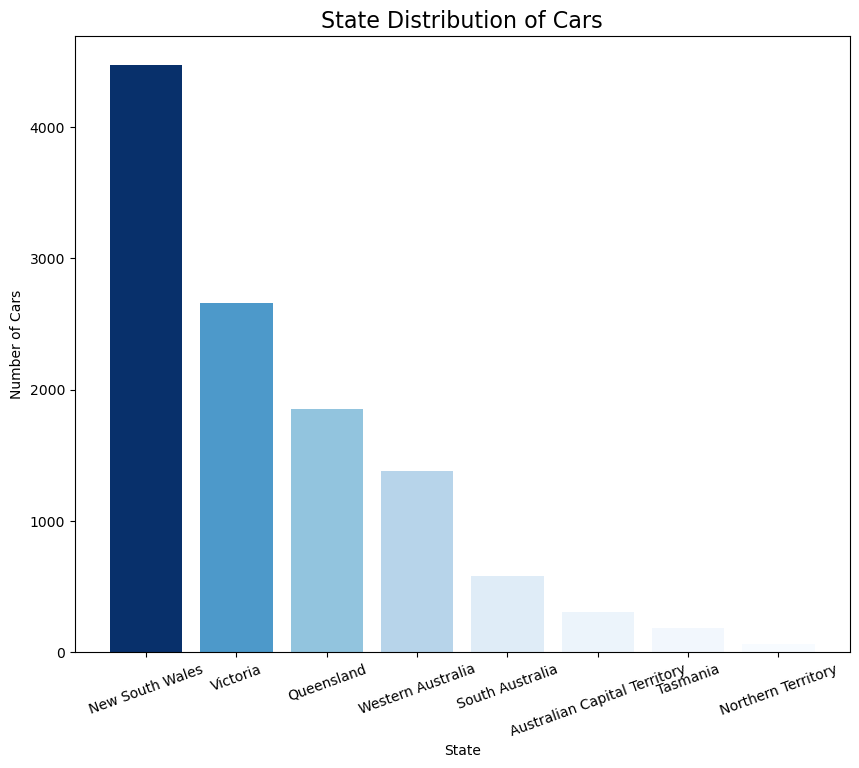

In [16]:
state_distribution = df['State_New'].value_counts()

# Normalize the state_distribution values for color mapping
norm = plt.Normalize(state_distribution.min(), state_distribution.max())
colors = plt.cm.Blues(norm(state_distribution.values))  # Generate shades of blue based on normalized values

plt.figure(figsize=(10, 8)) 

plt.bar(state_distribution.index, state_distribution.values, color=colors)
plt.title('State Distribution of Cars', fontsize=16)
plt.ylabel('Number of Cars')
plt.xlabel('State')
plt.xticks(rotation=20)  # Rotate the x-axis labels for better readability

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/CarListings_across_states.png')
plt.show()


The most popular color is: White


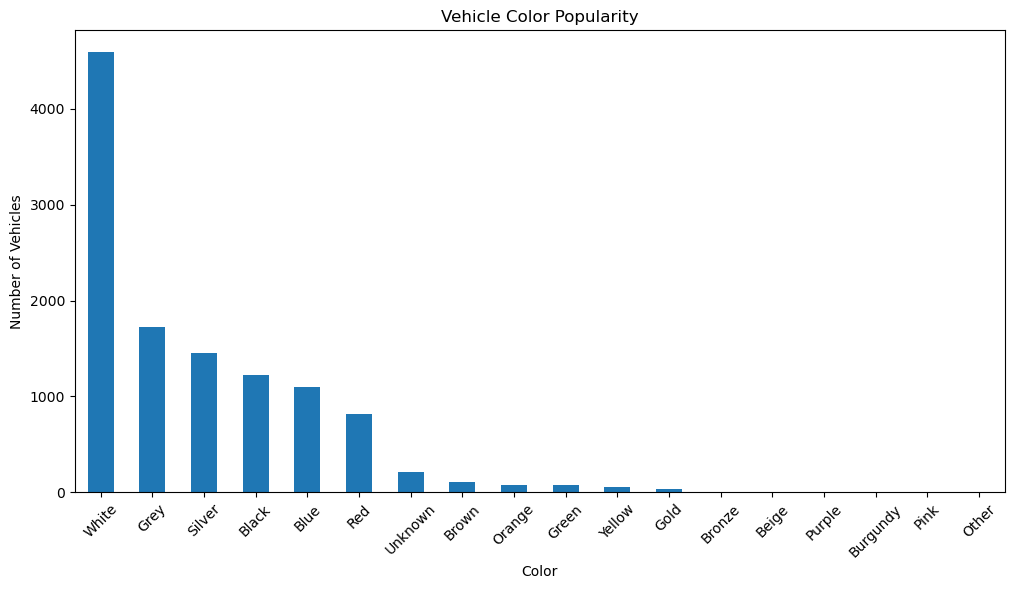

In [17]:
color_counts = df['ColorsExt'].value_counts()

# Most popular color
most_popular_color = color_counts.idxmax()
print(f"The most popular color is: {most_popular_color}")

# Visualization
plt.figure(figsize=(12, 6))

# Create a bar chart for color distribution
color_counts.plot(kind='bar')
# Normalize the state_distribution values for color mapping
norm = plt.Normalize(state_distribution.min(), state_distribution.max())
colors = plt.cm.Blues(norm(state_distribution.values))  # Generate shades of blue based on normalized values

plt.title('Vehicle Color Popularity')
plt.xlabel('Color')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)  

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Popular_color.png')
plt.show()

The most popular color from 2013 to 2017 is: White
The most popular color from 2018 to 2023 is: White


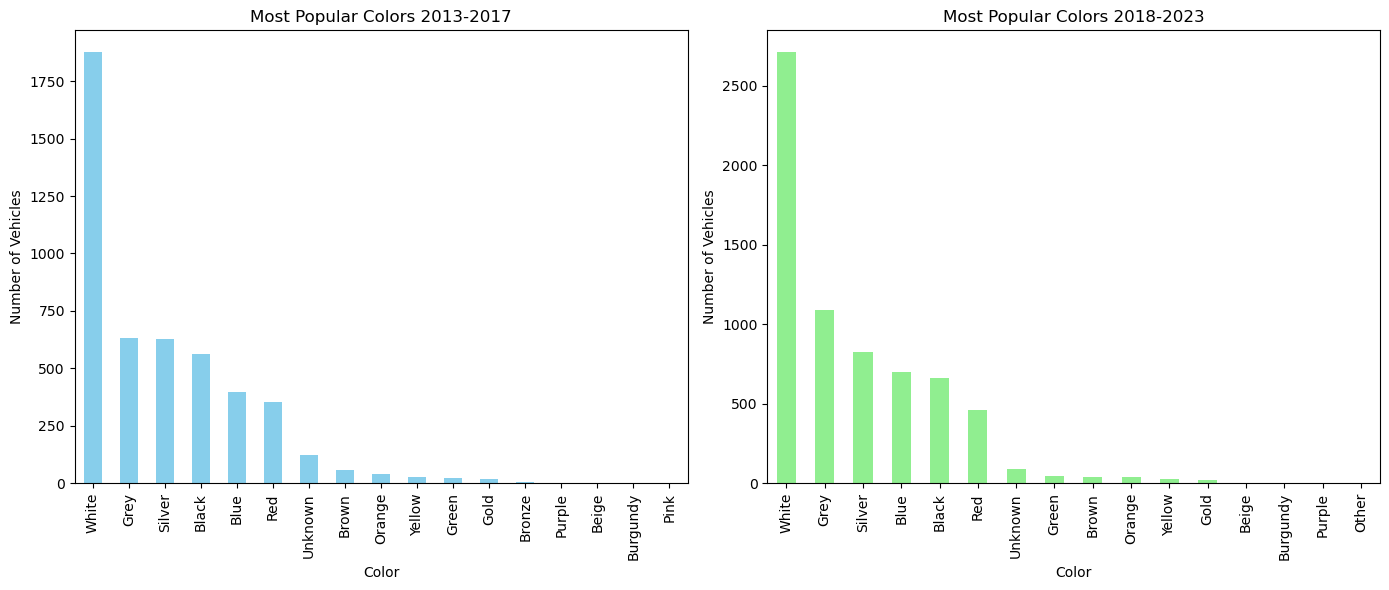

In [18]:
# Filter the DataFrame for the two periods
df_2013_2017 = df[df['Year'].between(2013, 2017)]
df_2018_2023 = df[df['Year'].between(2018, 2023)]

# Calculate the most popular color for each period
color_counts_2013_2017 = df_2013_2017['ColorsExt'].value_counts()
color_counts_2018_2023 = df_2018_2023['ColorsExt'].value_counts()

most_popular_color_2013_2017 = color_counts_2013_2017.idxmax()
most_popular_color_2018_2023 = color_counts_2018_2023.idxmax()

print(f"The most popular color from 2013 to 2017 is: {most_popular_color_2013_2017}")
print(f"The most popular color from 2018 to 2023 is: {most_popular_color_2018_2023}")

# Visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

color_counts_2013_2017.plot(kind='bar', color='skyblue', ax=axes[0], title='Most Popular Colors 2013-2017')
color_counts_2018_2023.plot(kind='bar', color='lightgreen', ax=axes[1], title='Most Popular Colors 2018-2023')

axes[0].set_ylabel('Number of Vehicles')
axes[0].set_xlabel('Color')
axes[1].set_ylabel('Number of Vehicles')
axes[1].set_xlabel('Color')

plt.tight_layout()
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Popular_color_2_periods.png')

plt.show()
